In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
# Veri setini yükle
california = fetch_california_housing(as_frame=True)

# DataFrame oluştur
df = california.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [40]:
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [42]:
model_dt = DecisionTreeRegressor(max_depth=5, random_state=42)
model_dt.fit(X_train, y_train)

# Tahmin yap
y_pred_dt = model_dt.predict(X_test)

# Başarı Metrikleri
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree -> MAE: {mae_dt:.4f}, MSE: {mse_dt:.4f}, R2: {r2_dt:.4f}")


Decision Tree -> MAE: 0.5276, MSE: 0.5211, R2: 0.6030


In [43]:
model_rf = RandomForestRegressor(n_estimators=5, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest -> MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}")


Random Forest -> MAE: 0.5108, MSE: 0.4874, R2: 0.6287


In [44]:
param_grid = {
    "n_estimators": list(range(5, 15)),
    "max_depth": list(range(3, 10))
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring="r2", cv=5)
grid.fit(X_train, y_train)

print("En iyi model:", grid.best_estimator_)
print("En iyi skor:", grid.best_score_)
print("En iyi parametreler:", grid.best_params_)

# En iyi model ile tahmin
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model -> MAE: {mae_best:.4f}, MSE: {mse_best:.4f}, R2: {r2_best:.4f}")


En iyi model: RandomForestRegressor(max_depth=9, n_estimators=14, random_state=42)
En iyi skor: 0.7564994928562432
En iyi parametreler: {'max_depth': 9, 'n_estimators': 14}
Best Model -> MAE: 0.3899, MSE: 0.3237, R2: 0.7534


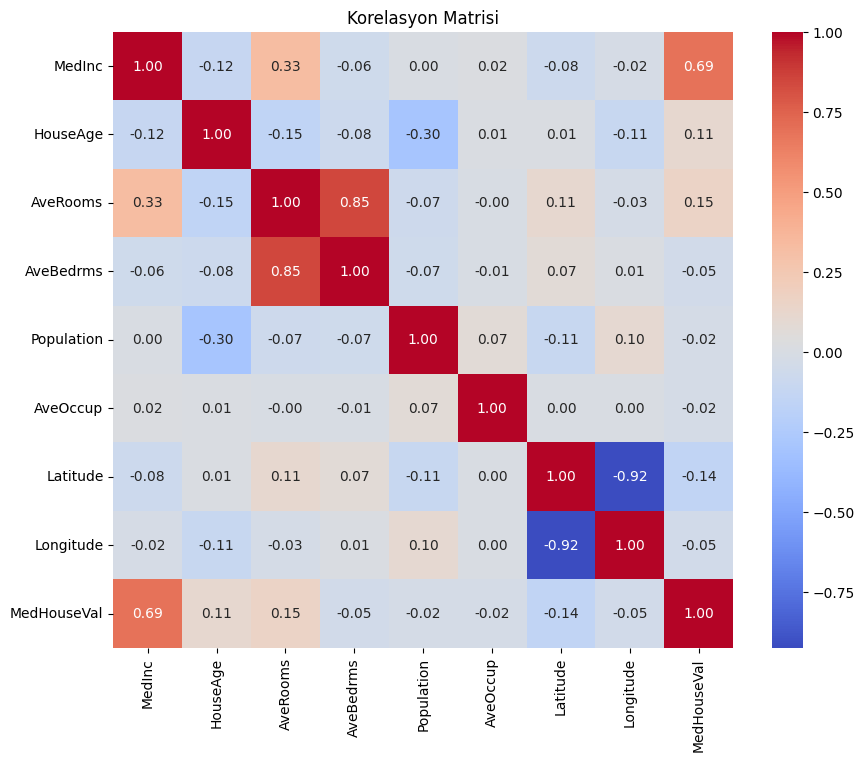

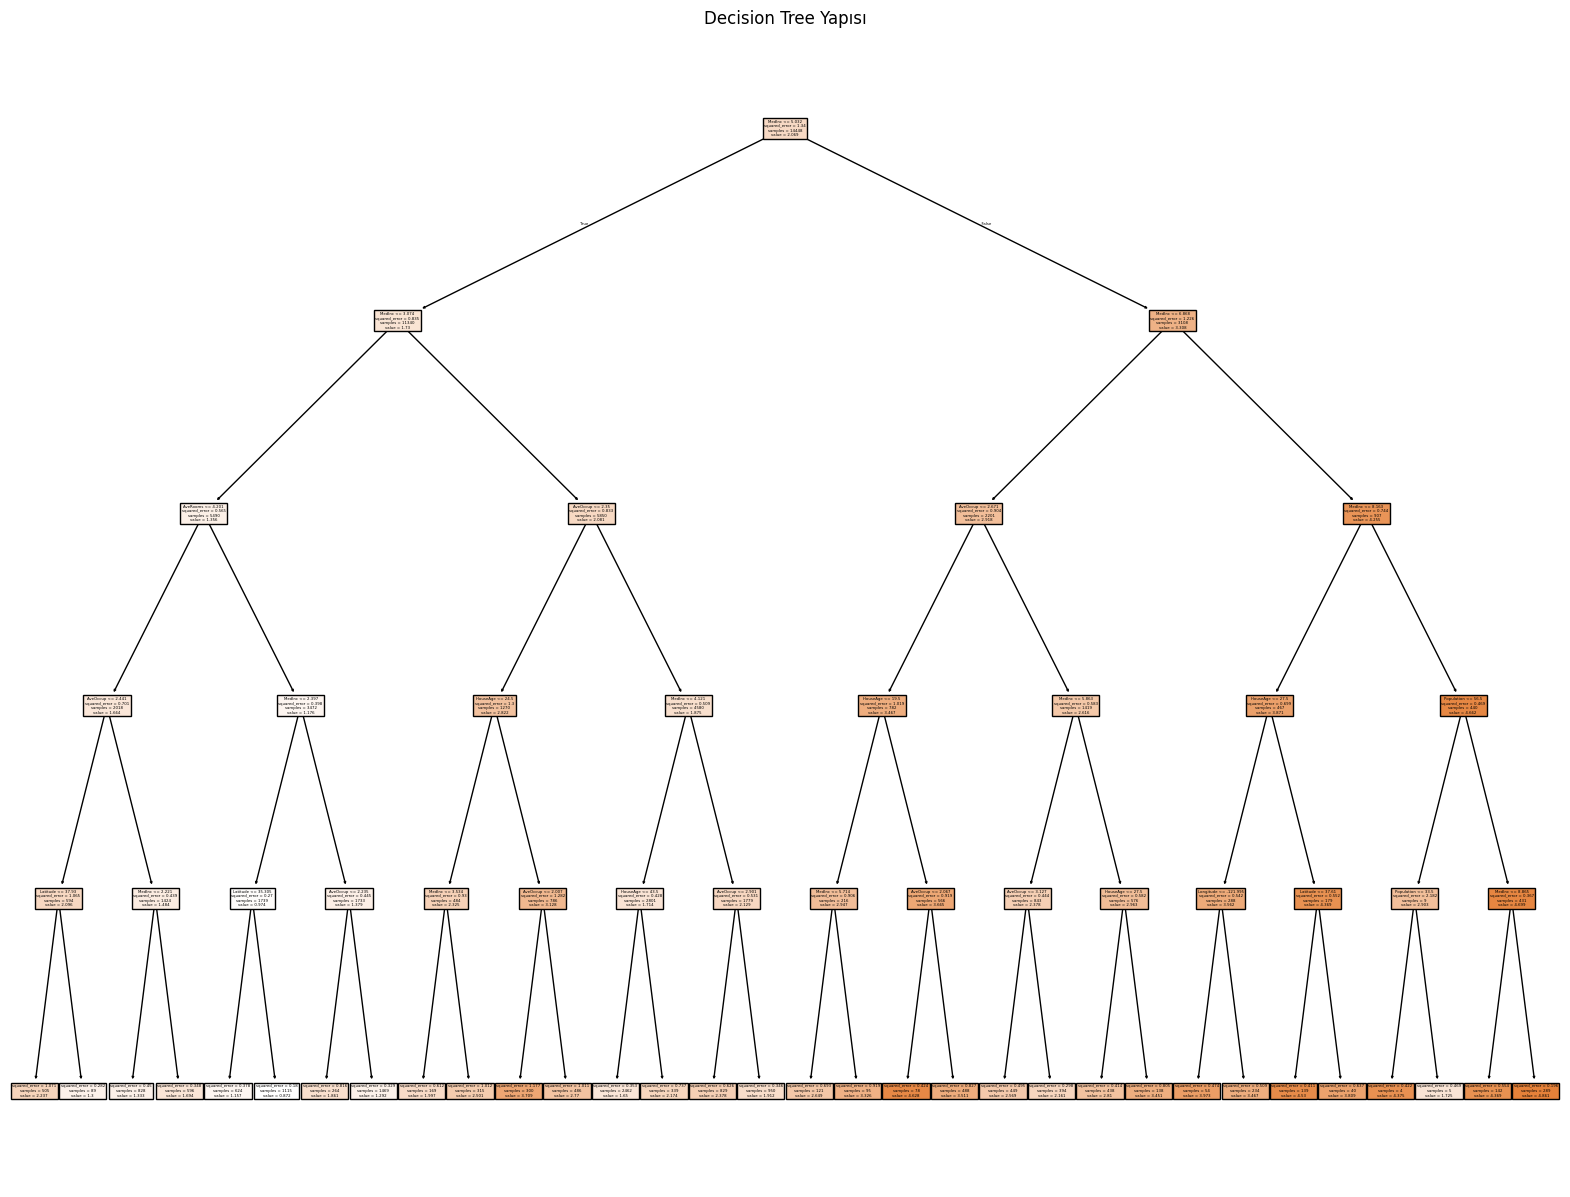

In [45]:
# Korelasyon Haritası
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

# Karar Ağacı Çizimi
plt.figure(figsize=(20,15))
plot_tree(model_dt, feature_names=X.columns, filled=True)
plt.title("Decision Tree Yapısı")
plt.show()


In [46]:
# Tüm sonuçları bir tabloya koy
results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Best Random Forest (GridSearchCV)"],
    "MAE": [mae_dt, mae_rf, mae_best],
    "MSE": [mse_dt, mse_rf, mse_best],
    "R2": [r2_dt, r2_rf, r2_best]
})

# Daha okunaklı hale getirmek için sayıları yuvarlayalım
results = results.round(4)

print(results)


                               Model     MAE     MSE      R2
0                      Decision Tree  0.5276  0.5211  0.6030
1                      Random Forest  0.5108  0.4874  0.6287
2  Best Random Forest (GridSearchCV)  0.3899  0.3237  0.7534
